## xgBoost : Merged Dataset (original + bert augmented + RTT augmented)

In [1]:
# COLAB
from google.colab import files
from google.colab import drive
# SYS
import sys
# IPYNB
!pip install import-ipynb
import import_ipynb
# UTIL
import importlib.util

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=7ec91ca8398205f965dc54b28c2ce726e43377d18eb55eff592e421d284f8c68
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#https://stackoverflow.com/questions/62117483/import-module-in-google-colab-from-google-drive-python
sys.path.append('/content/gdrive/MyDrive/CS--2/')
#import module_1_xml_to_df
#from module_1_xml_to_df import convert_xml_to_DataFrame
from module_2_preprocessing import Data_Preprocessing

Uninstalling nltk-3.2.5:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/nltk-3.2.5.dist-info/*
    /usr/local/lib/python3.6/dist-packages/nltk/*
Proceed (y/n)? y
  Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 1.4MB 5.3MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434676 sha256=104fac4ad0c92ac65a484e1c6df34288827efa25ee9bd45b7b7cb8ab6dc4b6ab
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


{'i', "couldn't", 'very', 'having', 'my', 'this', 't', "mightn't", 've', 'after', 'when', 'himself', 'on', 'mightn', 'which', "wouldn't", 'have', 'over', 'about', 'wasn', 'these', 'at', 'm', 'whom', 'shouldn', 'had', 'll', 'most', 'didn', 'herself', 'who', 'own', 'by', 'being', 'been', 'above', 'each', 'her', 'so', 'he', 'some', 'our', 'in', 'any', "haven't", 'between', 'further', 'the', 'theirs', "shouldn't", 'his', 'for', 'that', 'up', 'couldn', 'them', 'nor', "doesn't", 'am', "it's", 'against', 'then', 'they', 'me', 'both', 'other', 'will', 'isn', 's', 'him', 'how', "you're", 'few', 'just', 'are', 'or', 'your', 'can', 'a', "you'll", "you'd", 'what', "shan't", 'no', 'aren', 'wouldn', 'hers', "wasn't", "weren't", 'down', 'where', 'before', 'because', 'with', 'out', 'while', 're', "won't", 'but', 'and', 'did', "aren't", 'an', 'during', 'hadn', 'y', 'were', 'itself', 'don', 'again', 'not', 'you', 'do', 'if', 'below', "don't", 'yours', 'only', 'shan', 'same', 'd', 'once', 'was', "needn't

In [4]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from sklearn import linear_model, metrics  
import xgboost as xgb 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

## 1. Loading the data

In [6]:
data_1 = pd.read_csv("/content/gdrive/MyDrive/CS--2/restaurant_train_data_semeval_14.csv")
data_2 = pd.read_csv("/content/gdrive/MyDrive/CS--2/augmented_data_restaurant.csv")
data_3 = pd.read_csv("/content/gdrive/MyDrive/CS--2/augmented_data_restaurant_bert.csv")
data_restaurant = pd.concat([data_1 , data_2 , data_3])

In [7]:
data_restaurant.head()

,id,text,aspect_term,aspect_category,polarity
0,3121.0,but the staff was so horrible to us.,staff,service,negative
1,2777.0,"to be completely fair, the only redeeming fact...",food,anecdotes/miscellaneous,negative
2,1634.0,"the food is uniformly exceptional, with a very...",menu,food,positive
3,2534.0,where gabriela personaly greets you and recomm...,NaN,service,positive
4,583.0,"for those that go once and don't enjoy it, all...",NaN,anecdotes/miscellaneous,positive


In [9]:
data_restaurant.shape

(15220, 5)

In [11]:
data_restaurant.groupby('aspect_category').size().sort_values(ascending=False)

aspect_category
anecdotes/miscellaneous    5242
food                       4315
service                    2298
ambience                   1944
price                      1421
dtype: int64

In [13]:
catagories = data_restaurant['aspect_category'].unique()
catagories , len(catagories)

(array(['service', 'anecdotes/miscellaneous', 'food', 'price', 'ambience'],
       dtype=object), 5)

In [14]:
polarity = data_restaurant['polarity'].unique()
polarity

array(['negative', 'positive', 'neutral', 'conflict'], dtype=object)

In [15]:
X = data_restaurant['text']
Y = data_restaurant['aspect_category']

In [ ]:
# 3. Splitting the data 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12176,) (12176,)
(3044,) (3044,)


In [18]:
dp = Data_Preprocessing()

In [19]:
X_train_review = dp.preprocess_text(X_train)

100%|██████████| 12176/12176 [00:06<00:00, 1889.76it/s]


In [20]:
X_test_review = dp.preprocess_text(X_test)

100%|██████████| 3044/3044 [00:01<00:00, 2387.01it/s]


In [21]:
from sklearn.feature_extraction.text import CountVectorizer    
vectorizer_sit = CountVectorizer(min_df=3,max_features=50000)  
vectorizer_sit.fit(X_train_review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=50000, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [22]:
preprocessed_train_review = vectorizer_sit.transform(X_train_review).toarray()    # produces a sparse representation of preprocessed sentences
print("Shape of matrix data after one hot encoding for train: ",preprocessed_train_review .shape)

Shape of matrix data after one hot encoding for train:  (12176, 4049)


In [23]:
preprocessed_test_review = vectorizer_sit.transform(X_test_review).toarray()    
print("Shape of matrix data after one hot encoding for train: ",preprocessed_test_review.shape)

Shape of matrix data after one hot encoding for train:  (3044, 4049)


## 2. XgBoost Model

In [24]:
reg = xgb.XGBClassifier() 
reg.fit(preprocessed_train_review, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
# making predictions on the training set 
y_pred_train = reg.predict(preprocessed_train_review)

In [26]:
# making predictions on the testing set 
y_pred_cat = reg.predict(preprocessed_test_review)

In [27]:
# comparing actual response values (y_train) with predicted response values (y_pred_train) 
 
metrics.accuracy_score(y_train, y_pred_train)*100

75.3777923784494

In [28]:
# comparing actual response values (y_train) with predicted response values (y_pred_train) 

metrics.accuracy_score(y_test, y_pred_cat)*100

73.29172141918528

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cat ,target_names= catagories))

                         precision    recall  f1-score   support

                service       0.94      0.46      0.62       393
anecdotes/miscellaneous       0.66      0.90      0.76      1058
                   food       0.74      0.74      0.74       847
                  price       0.83      0.56      0.67       299
               ambience       0.84      0.69      0.76       447

               accuracy                           0.73      3044
              macro avg       0.80      0.67      0.71      3044
           weighted avg       0.76      0.73      0.73      3044



### Observation : 
This is the classification report of aspect category based sentiment model showing the orecision, recall, f1_score and support values for all 5 unique catagories with accuracy 73 percent 

In [30]:
# code borrowed from Microsoft Malware Detection Assignment
def plot_confusion_matrix(test_y, predict_y ,labels):
    C = confusion_matrix(test_y, predict_y)      # calculation of confusion matrix 
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y))    # number of misclassified points while predicting y
 
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))

    labels = labels                 
    cmap=sns.light_palette("purple")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))

    # representing B in heatmap format
    print("-"*50, "Recall matrix" , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in recall matrix",A.sum(axis=1))

Number of misclassified points  0.26708278580814715
-------------------------------------------------- Confusion matrix --------------------------------------------------


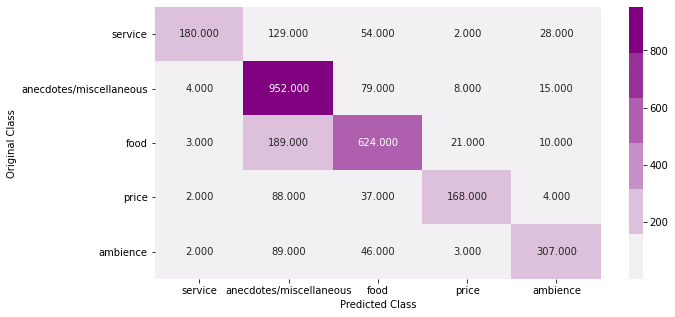

-------------------------------------------------- Precision matrix --------------------------------------------------


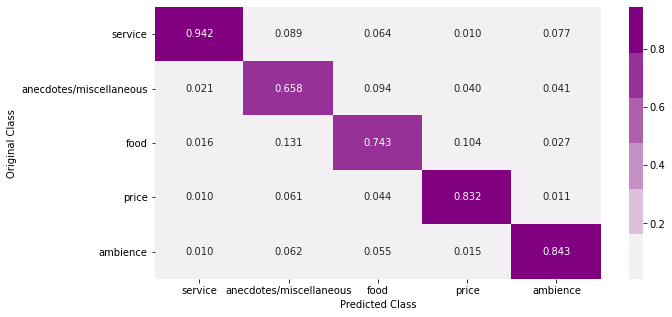

Sum of columns in precision matrix [1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


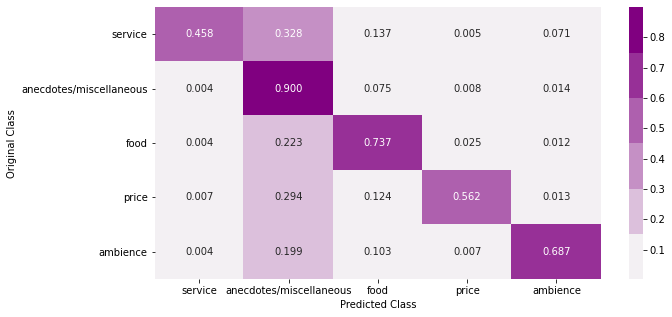

Sum of rows in recall matrix [1. 1. 1. 1. 1.]


In [31]:
plot_confusion_matrix(y_test,  y_pred_cat, catagories)

## 3.sentiment model

In [33]:
X = data_restaurant['text']
Y = data_restaurant['polarity']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12176,) (12176,)
(3044,) (3044,)


In [36]:
reg = xgb.XGBClassifier() 
reg.fit(preprocessed_train_review, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [37]:
# making predictions on the training set 
y_pred_train = reg.predict(preprocessed_train_review)

In [38]:
# making predictions on the testing set 
y_pred_polarity = reg.predict(preprocessed_test_review)

In [39]:
# comparing actual response values (y_train) with predicted response values (y_pred_train) 
 
metrics.accuracy_score(y_train, y_pred_train)*100

68.142247043364

In [40]:
metrics.accuracy_score(y_test, y_pred_polarity)*100

66.06438896189225

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_polarity ,target_names= polarity))

              precision    recall  f1-score   support

    negative       0.84      0.20      0.32       161
    positive       0.67      0.38      0.49       696
     neutral       0.93      0.13      0.23       486
    conflict       0.65      0.97      0.78      1701

    accuracy                           0.66      3044
   macro avg       0.77      0.42      0.45      3044
weighted avg       0.71      0.66      0.60      3044



Number of misclassified points  0.33935611038107755
-------------------------------------------------- Confusion matrix --------------------------------------------------


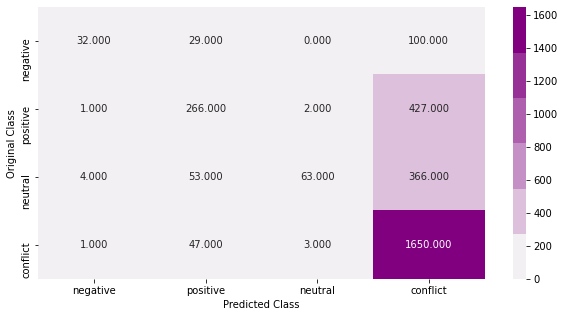

-------------------------------------------------- Precision matrix --------------------------------------------------


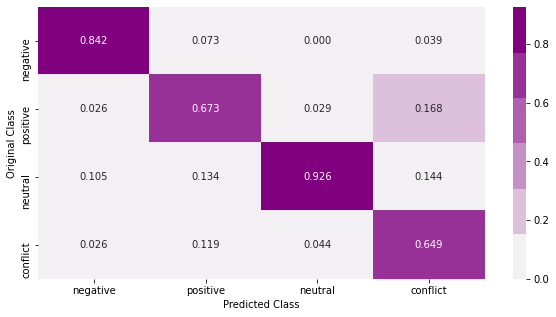

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


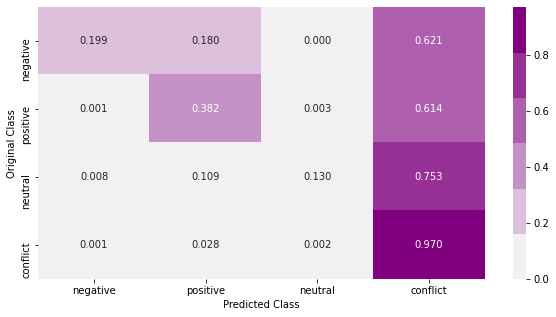

Sum of rows in recall matrix [1. 1. 1. 1.]


In [42]:
plot_confusion_matrix(y_test,  y_pred_polarity, polarity)

In [ ]:
#8. creating a resultant dataframe

In [43]:
def create_result_dataframe(pred_1,pred_2):
  # Calling DataFrame constructor on predicted outputs
  resultant_df = pd.DataFrame(list(zip(pred_1,pred_2)), columns = ["predicted_catagories" , "predicted_polarity"])
  result  = pd.crosstab(resultant_df.predicted_catagories,resultant_df.predicted_polarity ,margins = True , margins_name = "Total")
  result["Ranking"] = ( result.Total/resultant_df.shape[0]) * 5.0 
  result["Negative in %"] = (result.negative/result.Total) * 100
  result["Neutral in %"] = (result.neutral/result.Total) * 100
  result["Positive in %"] = (result.positive/result.Total) * 100
  result["conflict in %"] = (result.conflict/result.Total) * 100
  del result["negative"]
  del result["neutral"]
  del result["positive"]
  del result["Total"]
  del result["conflict"]

  return result

In [44]:
result = create_result_dataframe(y_pred_cat,y_pred_polarity)

In [45]:
result

predicted_polarity,Ranking,Negative in %,Neutral in %,Positive in %,conflict in %
predicted_catagories,,,,,
ambience,0.313732,6.282723,1.047120,89.528796,3.141361
anecdotes/miscellaneous,2.376807,11.748445,4.284727,83.275743,0.691085
food,1.379763,11.190476,0.476190,86.428571,1.904762
price,0.331800,25.247525,0.000000,74.752475,0.000000
service,0.597898,18.681319,0.000000,79.670330,1.648352
Total,5.000000,12.976347,2.233903,83.541393,1.248357
